In [38]:
import pandas as pd
method = 'CBLOF'

cae_df = pd.read_csv(f"experiments/Outlier_Detection/COMPETITORS/Results_CAE_{[method]}_all_datasets.csv")
elm_df =  pd.read_csv(f"experiments/Outlier_Detection/COMPETITORS/Results_ELM_{[method]}_all_datasets.csv")
hics_df = pd.read_csv(f"experiments/Outlier_Detection/COMPETITORS/Results_HiCS_{[method]}_all_datasets.csv")
clique_df = pd.read_csv(f"experiments/Outlier_Detection/COMPETITORS/Results_CLIQUE_{[method]}_all_datasets.csv")

pvalue_df = pd.read_csv(f"experiments/Outlier_Detection/Results_GOF_VGAN_all_datasets.csv")
statistics_df = pd.read_csv(f"experiments/Outlier_Detection/dataset_statistics.csv")

# Function to group by Dataset and Method, and calculate the average AUC
def group_by_dataset_method_avg_auc(df):
    grouped_df = df.groupby(['Dataset', 'Method'])['AUC'].mean().reset_index()
    return grouped_df

# Apply the function to the loaded dataframe
cae_df = group_by_dataset_method_avg_auc(cae_df)
elm_df = group_by_dataset_method_avg_auc(elm_df)
hics_df = group_by_dataset_method_avg_auc(hics_df)
clique_df = group_by_dataset_method_avg_auc(clique_df)


grouped_df_1 = pd.merge(cae_df,elm_df[['Dataset','AUC']], on = 'Dataset', how = 'outer')
grouped_df_2 = pd.merge(grouped_df_1, hics_df[['Dataset','AUC']], on = 'Dataset', how = 'outer')
grouped_df_2 = grouped_df_2.rename(columns = {'AUC_x': 'CAE', 'AUC_y': 'ELM', 'AUC':'HiCS'})
grouped_df = pd.merge(grouped_df_2, clique_df[['Dataset','AUC']], on = 'Dataset', how = 'outer')
grouped_df = grouped_df.rename(columns = {'AUC':'CLIQUE'}).fillna(0)


grouped_df.to_csv("res.csv", sep=";")

In [39]:
grouped_df

,Dataset,Method,CAE,ELM,HiCS,CLIQUE
0,20news_0,CBLOF,0.595418,0.685005,0.479168,0.000000
1,CIFAR10_0,CBLOF,0.674716,0.000000,0.706084,0.000000
2,Cardiotocography,CBLOF,0.676572,0.664726,0.000000,0.000000
3,FashionMNIST_0,CBLOF,0.774189,0.000000,0.000000,0.000000
4,Hepatitis,CBLOF,0.581065,0.616568,0.502959,0.000000
5,InternetAds,CBLOF,0.414066,0.000000,0.000000,0.000000
6,Ionosphere,CBLOF,0.915503,0.964691,0.943439,0.000000
7,Lymphography,CBLOF,0.790476,0.954762,0.958333,0.000000
8,MNIST-C_brightness,CBLOF,0.707930,0.000000,0.000000,0.000000
9,MVTec-AD_bottle,CBLOF,0.967943,0.958765,0.000000,0.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.environ["PATH"] += os.pathsep + '/home/i40/cribeiro/usr/local/texlive/2024/bin/x86_64-linux'
print(os.getenv("PATH"))
latex_preamble = """
\\usepackage[utf8]{inputenc}
\\usepackage{microtype}
\\usepackage{amsmath}
\\renewcommand{\\rmdefault}{ptm}
\\renewcommand{\\sfdefault}{phv}
"""
fs = 9
column_width = 3.3249219444  # inch
text_width = 7.02625  # inch
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": latex_preamble,
    "font.family": "serif",
    "font.serif": [],
    "font.sans-serif": [],
    "font.monospace": [],
    "font.size": fs,
    "xtick.labelsize": fs,
    "ytick.labelsize": fs,
    "legend.fontsize": fs,
    "savefig.bbox": "tight",
})


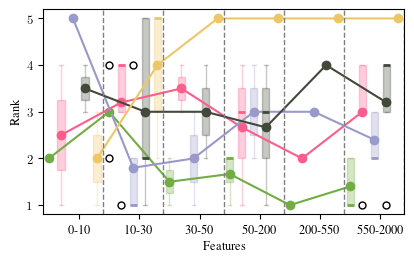

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

#Define the dataset 
odm = "COPOD"
type_u = "non-lense"
# Load the CSV file
df = pd.read_csv(f'experiments/Outlier_Detection/COMPETITORS/full_tables_with_rank/{odm}_res.csv', delimiter=',',)

# Filter the datasets where p-value > 0.10
filtered_pvalue_df = df
if type_u == "lense":
    filtered_pvalue_df = df[df['p-value'] > 0.10]
else :
    filtered_pvalue_df = df[df['p-value'] < 0.10]
    type_u = "non-lense"

#Define the colors to use
vgan_color = "#72AD44"
cae_color = "#FF5C8E"
elm_color = "#9999CC"
hics_color = "#42493A"
clique_color = "#EFC665"

# Further filter by the feature ranges
# Further filter by the feature ranges
filtered_pvalue_0_10 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] > 0) & (filtered_pvalue_df['# Features'] <= 8)]
filtered_pvalue_10_30 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 10) & (filtered_pvalue_df['# Features'] <= 30)]
filtered_pvalue_30_50 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] > 30) & (filtered_pvalue_df['# Features'] < 50)]
filtered_pvalue_50_100 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 50) & (filtered_pvalue_df['# Features'] <= 200)]
filtered_pvalue_100_300 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 200) & (filtered_pvalue_df['# Features'] <= 550)]
filtered_pvalue_300_700 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 550) & (filtered_pvalue_df['# Features'] <= 2000)]
filtered_pvalue_700_2000 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 700) & (filtered_pvalue_df['# Features'] <= 2000)]

# Extract VGAN, ENSEMBLE, and FS ranks for these filtered datasets
vgan_pvalue_ranks_0_10 = filtered_pvalue_0_10['RANK VGAN']
vgan_pvalue_ranks_10_30 = filtered_pvalue_10_30['RANK VGAN']
vgan_pvalue_ranks_30_50 = filtered_pvalue_30_50['RANK VGAN']
vgan_pvalue_ranks_50_100 = filtered_pvalue_50_100['RANK VGAN']
vgan_pvalue_ranks_100_300 = filtered_pvalue_100_300['RANK VGAN']
vgan_pvalue_ranks_300_700 = filtered_pvalue_300_700['RANK VGAN']
vgan_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK VGAN']

cae_pvalue_ranks_0_10     =     filtered_pvalue_0_10['RANK CAE']
cae_pvalue_ranks_10_30    =    filtered_pvalue_10_30['RANK CAE']
cae_pvalue_ranks_30_50    =    filtered_pvalue_30_50['RANK CAE']
cae_pvalue_ranks_50_100   =   filtered_pvalue_50_100['RANK CAE']
cae_pvalue_ranks_100_300  =  filtered_pvalue_100_300['RANK CAE']
cae_pvalue_ranks_300_700  =  filtered_pvalue_300_700['RANK CAE']
cae_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK CAE']

hics_pvalue_ranks_0_10     =     filtered_pvalue_0_10['RANK HiCS']
hics_pvalue_ranks_10_30    =    filtered_pvalue_10_30['RANK HiCS']
hics_pvalue_ranks_30_50    =    filtered_pvalue_30_50['RANK HiCS']
hics_pvalue_ranks_50_100   =   filtered_pvalue_50_100['RANK HiCS']
hics_pvalue_ranks_100_300  =  filtered_pvalue_100_300['RANK HiCS']
hics_pvalue_ranks_300_700  =  filtered_pvalue_300_700['RANK HiCS']
hics_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK HiCS']

elm_pvalue_ranks_0_10     =     filtered_pvalue_0_10['RANK ELM']
elm_pvalue_ranks_10_30    =    filtered_pvalue_10_30['RANK ELM']
elm_pvalue_ranks_30_50    =    filtered_pvalue_30_50['RANK ELM']
elm_pvalue_ranks_50_100   =   filtered_pvalue_50_100['RANK ELM']
elm_pvalue_ranks_100_300  =  filtered_pvalue_100_300['RANK ELM']
elm_pvalue_ranks_300_700  =  filtered_pvalue_300_700['RANK ELM']
elm_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK ELM']

clique_pvalue_ranks_0_10     =     filtered_pvalue_0_10['RANK CLIQUE']
clique_pvalue_ranks_10_30    =    filtered_pvalue_10_30['RANK CLIQUE']
clique_pvalue_ranks_30_50    =    filtered_pvalue_30_50['RANK CLIQUE']
clique_pvalue_ranks_50_100   =   filtered_pvalue_50_100['RANK CLIQUE']
clique_pvalue_ranks_100_300  =  filtered_pvalue_100_300['RANK CLIQUE']
clique_pvalue_ranks_300_700  =  filtered_pvalue_300_700['RANK CLIQUE']
clique_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK CLIQUE']



# Calculating the average ranks for each group
all_averages = {
    "0-10": vgan_pvalue_ranks_0_10.mean(),
    "10-30": vgan_pvalue_ranks_10_30.mean(),
    "30-50": vgan_pvalue_ranks_30_50.mean(),
    "50-100": vgan_pvalue_ranks_50_100.mean(),
    "100-300": vgan_pvalue_ranks_100_300.mean(),
    "300-700": vgan_pvalue_ranks_300_700.mean(),
    "700-2000": vgan_pvalue_ranks_700_2000.mean()
}


# Creating the combined boxplot with individual boxplots, line plots of the average ranks, and vertical lines to indicate group limits
plt.figure(figsize=(2*7/3, 2*4/3))

# Creating the boxplots for VGAN, ENSEMBLE, and FS
boxplot_vgan = plt.boxplot(
    [vgan_pvalue_ranks_0_10, vgan_pvalue_ranks_10_30, vgan_pvalue_ranks_30_50, vgan_pvalue_ranks_50_100,
        vgan_pvalue_ranks_100_300, vgan_pvalue_ranks_300_700],
    positions=[1, 6, 11, 16, 21, 26],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor=vgan_color, color=vgan_color, alpha=0.3),
    whiskerprops=dict(color=vgan_color, alpha=0.3),
    capprops=dict(color=vgan_color, alpha=0.3),
    medianprops=dict(color=vgan_color,linewidth=2),
    flierprops=dict(marker='o', markersize=5,
                    linestyle='none', linewidth=2, color=vgan_color)
)

boxplot_cae = plt.boxplot(
    [cae_pvalue_ranks_0_10, cae_pvalue_ranks_10_30, cae_pvalue_ranks_30_50, cae_pvalue_ranks_50_100,
        cae_pvalue_ranks_100_300, cae_pvalue_ranks_300_700],
    positions=[2, 7, 12, 17, 22, 27],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor=cae_color, color=cae_color, alpha=0.3),
    whiskerprops=dict(color=cae_color, alpha=0.3),
    capprops=dict(color=cae_color, alpha=0.3),
    medianprops=dict(color=cae_color,linewidth=2),
    flierprops=dict(marker='o', markersize=5, linestyle='none',
                    linewidth=2, color=cae_color)
)


boxplot_elm = plt.boxplot(
    [elm_pvalue_ranks_0_10, elm_pvalue_ranks_10_30, elm_pvalue_ranks_30_50, elm_pvalue_ranks_50_100,
        elm_pvalue_ranks_100_300, elm_pvalue_ranks_300_700],
    positions=[3, 8, 13, 18, 23, 28],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor=elm_color, color=elm_color, alpha=0.3),
    whiskerprops=dict(color=elm_color, alpha=0.3),
    capprops=dict(color=elm_color, alpha=0.3),
    medianprops=dict(color=elm_color,linewidth=2),
    flierprops=dict(marker='o', markersize=5, linestyle='none',
                    linewidth=2, color=elm_color)
)

boxplot_hics = plt.boxplot(
    [hics_pvalue_ranks_0_10, hics_pvalue_ranks_10_30, hics_pvalue_ranks_30_50, hics_pvalue_ranks_50_100,
        hics_pvalue_ranks_100_300, hics_pvalue_ranks_300_700],
    positions=[4, 9, 14, 19, 24, 29],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor=hics_color, color=hics_color, alpha=0.3),
    whiskerprops=dict(color=hics_color, alpha=0.3),
    capprops=dict(color=hics_color, alpha=0.3),
    medianprops=dict(color=hics_color,linewidth=2),
    flierprops=dict(marker='o', markersize=5, linestyle='none',
                    linewidth=2, color=hics_color)
)

boxplot_clique = plt.boxplot(
    [clique_pvalue_ranks_0_10, clique_pvalue_ranks_10_30, clique_pvalue_ranks_30_50, clique_pvalue_ranks_50_100,
        clique_pvalue_ranks_100_300, clique_pvalue_ranks_300_700],
    positions=[5, 10, 15, 20, 25, 30],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor=clique_color, color=clique_color, alpha=0.3),
    whiskerprops=dict(color=clique_color, alpha=0.3),
    capprops=dict(color=clique_color, alpha=0.3),
    medianprops=dict(color=clique_color,linewidth=2),
    flierprops=dict(marker='o', markersize=5, linestyle='none',
                    linewidth=2, color=clique_color)
)

pos = np.array([1, 6, 11, 16, 21, 26])
# Plotting the average ranks for VGAN, ENSEMBLE, and FS as line plots on top of the boxplots
plt.plot(
    pos,
    [all_averages["0-10"], all_averages["10-30"], all_averages["30-50"], all_averages["50-100"],
        all_averages["100-300"], all_averages["300-700"]],
    color=vgan_color, marker='o', linestyle='-', linewidth=1.5, label='VGAN'
)

plt.plot(
    pos + 1,
    [cae_pvalue_ranks_0_10.mean(), cae_pvalue_ranks_10_30.mean(), cae_pvalue_ranks_30_50.mean(), cae_pvalue_ranks_50_100.mean(),
     cae_pvalue_ranks_100_300.mean(), cae_pvalue_ranks_300_700.mean()],
    color=cae_color, marker='o', linestyle='-', linewidth=1.5, label='CAE'
)

plt.plot(
    pos + 2,
    [elm_pvalue_ranks_0_10.mean(), elm_pvalue_ranks_10_30.mean(), elm_pvalue_ranks_30_50.mean(), elm_pvalue_ranks_50_100.mean(),
     elm_pvalue_ranks_100_300.mean(), elm_pvalue_ranks_300_700.mean()],
    color=elm_color, marker='o', linestyle='-', linewidth=1.5, label='ELM'
)

plt.plot(
    pos + 3,
    [hics_pvalue_ranks_0_10.mean(), hics_pvalue_ranks_10_30.mean(), hics_pvalue_ranks_30_50.mean(), hics_pvalue_ranks_50_100.mean(),
     hics_pvalue_ranks_100_300.mean(), hics_pvalue_ranks_300_700.mean()],
    color=hics_color, marker='o', linestyle='-', linewidth=1.5, label='HiCS'
)

plt.plot(
    pos + 4,
    [clique_pvalue_ranks_0_10.mean(), clique_pvalue_ranks_10_30.mean(), clique_pvalue_ranks_30_50.mean(), clique_pvalue_ranks_50_100.mean(),
     clique_pvalue_ranks_100_300.mean(), clique_pvalue_ranks_300_700.mean()],
    color=clique_color, marker='o', linestyle='-', linewidth=1.5, label='CLIQUE'
)

# Adding vertical lines to indicate the limits of each group on the x-axis
for x in [5.5, 10.5, 15.5, 20.5, 25.5, 30.5]:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# Setting the x-axis labels
plt.xticks(pos + 2.5, ['0-10', '10-30',
           '30-50', '50-200', '200-550', '550-2000'])

plt.xlabel('Features')
plt.ylabel('Rank')
if odm == "LOF":
    legend = plt.legend(ncols = 1)
    legend.set_alpha(.1)

#legend.set_bbox_to_anchor((.45,.1))
plt.savefig(f'experiments/Outlier_Detection/COMPETITORS/{odm}_{type_u}.png',dpi=1000)
plt.show()

# CONOVER-IMAN

In [44]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp
import numpy as np 

#Specify the odm
odm = "COPOD"

# Load the data
df = pd.read_csv(f'experiments/Outlier_Detection/COMPETITORS/full_tables_with_rank/{odm}_res.csv', delimiter=',')

#Using a lense operator
df = df[df['p-value'] < 0.10]

# Extracting the ranks for each model
ranks_cae = df['RANK CAE'].dropna()
ranks_hics = df['RANK HiCS'].dropna()
ranks_vgan = df['RANK VGAN'].dropna()
ranks_clique = df['RANK CLIQUE'].dropna()
ranks_elm = df['RANK ELM'].dropna()

# Performing the Kruskal-Wallis test
kruskal_result = stats.kruskal(ranks_cae, ranks_hics, ranks_clique, ranks_elm, ranks_vgan)
print(f"Kruskal-Wallis Test Result: {kruskal_result}")

# If the p-value from Kruskal-Wallis test is significant, perform Conover-Iman test
conover_result = sp.posthoc_conover([ranks_cae, ranks_hics, ranks_clique, ranks_elm, ranks_vgan])
conover_result.index = ["CAE", "HiCS", "CLIQUE", "ELM", "VGAN"]
conover_result.columns =  ["CAE", "HiCS", "CLIQUE", "ELM", "VGAN"]
print("Conover-Iman Test Result:\n", conover_result)


print(f"Count of datasets:{df.index.__len__()}")

# Calculate the average ranks for each method
avg_ranks = pd.DataFrame({
    'CAE': [np.mean(ranks_cae)],
    'HiCS': [np.mean(ranks_hics)],
    'CLIQUE': [np.mean(ranks_clique)],
    'ELM': [np.mean(ranks_elm)],
    'VGAN': [np.mean(ranks_vgan)]
}).T
avg_ranks.columns = ['Average Rank']
avg_ranks = avg_ranks.sort_values(by='Average Rank')  # Sort by rank if necessary

print("Average Ranks:\n", avg_ranks)

# Create a matrix for storing the + and ++ symbols
symbol_matrix = pd.DataFrame('', index=conover_result.index, columns=conover_result.columns)

# Fill in the matrix based on the p-value and average rank conditions
for row in conover_result.index:
    for col in conover_result.columns:
        if row != col:  # No comparison with itself
            p_value = conover_result.loc[row, col]
            if p_value <= 0.10 and avg_ranks.loc[row, 'Average Rank'] < avg_ranks.loc[col, 'Average Rank']:
                if p_value <= 0.05:
                    symbol_matrix.loc[row, col] = '++'
                else:
                    symbol_matrix.loc[row, col] = '+'
            if p_value <= 0.10 and avg_ranks.loc[row, 'Average Rank'] > avg_ranks.loc[col, 'Average Rank']:
                if p_value <= 0.05:
                    symbol_matrix.loc[row, col] = '--'
                else:
                    symbol_matrix.loc[row, col] = '-'
        if row == col:
            symbol_matrix.loc[row,col] = "="
print(f"\nThis leads to a symbolic matrix of:\n {symbol_matrix}")

Kruskal-Wallis Test Result: KruskalResult(statistic=26.271201814058966, pvalue=2.789942706105289e-05)
Conover-Iman Test Result:
              CAE      HiCS        CLIQUE       ELM          VGAN
CAE     1.000000  0.712537  7.926213e-03  0.623330  2.680044e-03
HiCS    0.712537  1.000000  2.680044e-03  0.902223  7.926213e-03
CLIQUE  0.007926  0.002680  1.000000e+00  0.001829  8.191769e-08
ELM     0.623330  0.902223  1.828553e-03  1.000000  1.113569e-02
VGAN    0.002680  0.007926  8.191769e-08  0.011136  1.000000e+00
Count of datasets:21
Average Ranks:
         Average Rank
VGAN        1.904762
ELM         2.904762
HiCS        2.952381
CAE         3.095238
CLIQUE      4.142857

This leads to a symbolic matrix of:
        CAE HiCS CLIQUE ELM VGAN
CAE      =          ++       --
HiCS          =     ++       --
CLIQUE  --   --      =  --   --
ELM                 ++   =   --
VGAN    ++   ++     ++  ++    =
